### textblob 0.15.2
**Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.**
* https://pypi.org/project/textblob/

### Relevancia 

Para medir la **relevancia** de una cuenta de Twitter no basta con observar atributos triviales como el numero de seguidores, debido a cuentas **follow-back** sígueme y te sigo, que crean comunidades con usuarios que se siguem mutamente entre ellos pudiendo llegar a númneros muy grandes de seguidores sin tener ninguna relevancia real, y a prácticas como las llamadas granajas de clicks **click farms**, que han alcanzado las redes sociales.

Por ellos es necesario el uso de técnicas más sofisticadas para poder calcular la revevancia de cuentas en twitter. Si se tienen en cuenta los seguirdores de una cuenta, habría que comprobar tambíen la relevancias de esos seguidores, para asegurarnos que no sean cuentas falsas y que esas relaciones sean significativas.


### Anàlisis de sentimiento

**Análisis de sentimiento** es el uso de técnicas como las de procesamiento de lenguaje natural para poder extaer a partir de algún recursos información acerca de la actitud de su autor.De esta actitud se pueden detectar opiniones o estados de ánimo.

Se puede considerar este problema como uno de ***clasificación***, en el que se trata de clasificar cada documento en una categoría de acuero a la opinión o estado de ánimo detectado.


In [4]:
!pip install textblob

In [17]:
#Se importa la librería tweepy
import tweepy

In [26]:
#Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:
#Se define las variables para el acceso al API de twitter
consumer_key = 'nfcNu5mb925cpERcbQbpGWxsi'
consumer_secret = 'DSn9hWFZM79nmAovlNGFV2mg29O3WRlxPNggMM9GcYh3uNT6eP'
access_token = '292908760-wGSl6T8euoKJ0NHda9FLGLkaOUnq8vRxFnXRQK6u'
access_token_secret = 'sIgDEnXMP11b0u5QlT37gTJOoNvyRgdbI2A5lKpzOFw16'

In [28]:
#Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [29]:
#se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

Jorge Lopez


In [35]:
#Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")
#Se define la cantida de tweets a capturar
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")


Buscar: java
Número de tweets a capturar: 100
Idioma [es/en]:en


In [36]:
def ObtenerTweets(palabra,numero_de_Tweets,lenguaje):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

In [32]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()
    

In [37]:
numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

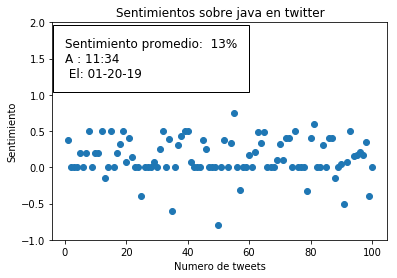

In [38]:
GraficarDatos(numeros_list,popularidad_list,numero)